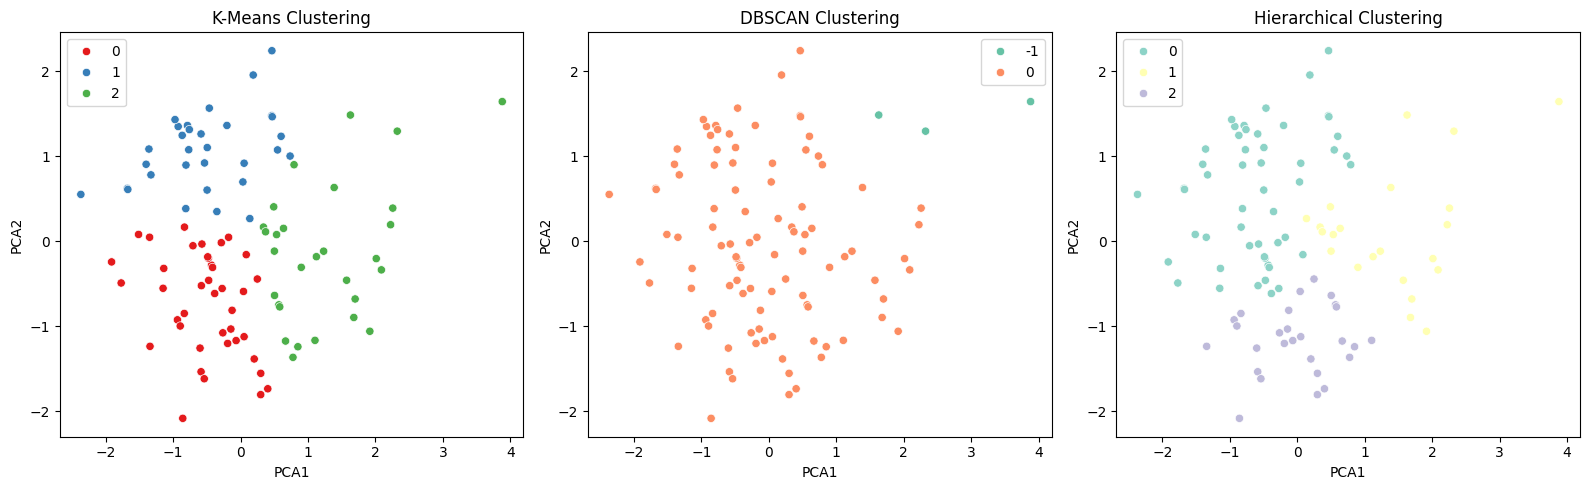


Cluster Profiling (K-Means):
                      Age  Annual_Income  Policy_Count  Total_Premium_Paid  \
Cluster_KMeans                                                               
0               45.750000   78333.978000      3.025000        30232.241000   
1               40.129032   86203.851935      2.935484         8911.388065   
2               43.482759   79581.198276      2.862069        35081.659655   

                Claim_Frequency  Policy_Upgrades  
Cluster_KMeans                                    
0                      0.725000         2.050000  
1                      1.741935         1.451613  
2                      2.517241         0.586207  


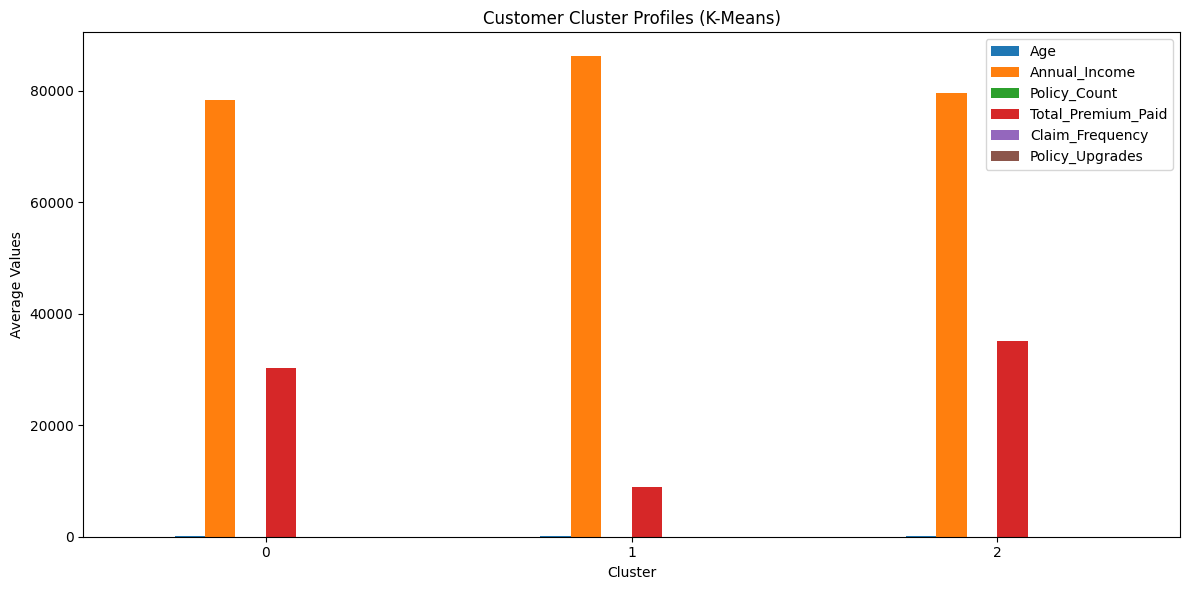


Segment Labels Assigned to Each Customer:
  Customer_ID  Cluster_KMeans         Segment_Label
0    CUST0001               2     Frequent Claimers
1    CUST0002               0   Loyal High-Spenders
2    CUST0003               0   Loyal High-Spenders
3    CUST0004               2     Frequent Claimers
4    CUST0005               1  Young Budget Seekers


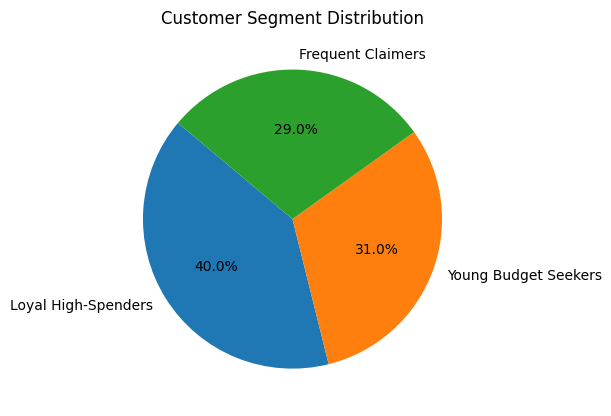


Cluster Evaluation Metrics (KMeans):
Silhouette Score: 0.361
Davies-Bouldin Index: 0.892


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
df = pd.read_csv("customer_segmentation_dataset.csv")

# Select columns for scaling
cols_to_scale = ['Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades']

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cols_to_scale])
joblib.dump(scaler, 'models/scaler.pkl')

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
joblib.dump(pca, 'models/pca.pkl')

# Store PCA results in DataFrame
pca_df = pd.DataFrame(pca_features, columns=["PCA1", "PCA2"])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df["Cluster_KMeans"] = kmeans.fit_predict(pca_features)
joblib.dump(kmeans, 'models/kmeans.pkl')

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
pca_df["Cluster_DBSCAN"] = dbscan.fit_predict(pca_features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
pca_df["Cluster_Hierarchical"] = hierarchical.fit_predict(pca_features)

# Merge with original dataframe
scaled_df = pd.DataFrame(scaled_features, columns=[f"Scaled_{col}" for col in cols_to_scale])
result_df = pd.concat([df, scaled_df, pca_df], axis=1)

# Save full result to CSV
result_df.to_csv("customer_segments_labeled.csv", index=False)

# Cluster Visualizations
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster_KMeans", palette="Set1")
plt.title("K-Means Clustering")
plt.legend(loc='best')

plt.subplot(1, 3, 2)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster_DBSCAN", palette="Set2")
plt.title("DBSCAN Clustering")
plt.legend(loc='best')

plt.subplot(1, 3, 3)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster_Hierarchical", palette="Set3")
plt.title("Hierarchical Clustering")
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Cluster Profiling - Analyze characteristics of KMeans clusters
cluster_profiles = result_df.groupby("Cluster_KMeans")[['Age', 'Annual_Income', 'Policy_Count', 'Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades']].mean()
print("\nCluster Profiling (K-Means):")
print(cluster_profiles)

# Bar Plot for Cluster Profiling
cluster_profiles.plot(kind='bar', figsize=(12, 6))
plt.title("Customer Cluster Profiles (K-Means)")
plt.ylabel("Average Values")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Add descriptive labels to clusters based on profiling
cluster_labels = {
    0: "Loyal High-Spenders",
    1: "Young Budget Seekers",
    2: "Frequent Claimers"
}
joblib.dump(cluster_labels, 'models/cluster_labels.pkl')

result_df["Segment_Label"] = result_df["Cluster_KMeans"].map(cluster_labels)
print("\nSegment Labels Assigned to Each Customer:")
print(result_df[["Customer_ID", "Cluster_KMeans", "Segment_Label"]].head())

# Pie chart for segment distribution
segment_counts = result_df["Segment_Label"].value_counts()
segment_counts.plot.pie(autopct='%1.1f%%', startangle=140, figsize=(6, 6), title="Customer Segment Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Cluster Evaluation Metrics (KMeans)
sil_score = silhouette_score(pca_features, pca_df["Cluster_KMeans"])
dbi_score = davies_bouldin_score(pca_features, pca_df["Cluster_KMeans"])

print("\nCluster Evaluation Metrics (KMeans):")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {dbi_score:.3f}")


In [9]:
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Example model objects — replace with your trained models
with open("C:/Users/Administrator/models/customer_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("C:/Users/Administrator/models/pca.pkl", "wb") as f:
    pickle.dump(pca, f)

with open("C:/Users/Administrator/models/kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("C:/Users/Administrator/models/cluster_labels.pkl", "wb") as f:
    pickle.dump(cluster_labels, f)
